# CPSC 4810 Project
By: Chun Yin (Edward) Chiu, David Vazquez Lizama, Kania Lywe, Nguyen Ngoc Huynh Nhu (Nicky)

Sources of data: 

"World Happiness Report", 2020, Kaggle, Accessed April 7, 2020, https://www.kaggle.com/unsdsn/world-happiness#2016.csv

"World Development Indicators”, 2020, Databank of the World Bank Organization, Accessed April 7, 2020, https://databank.worldbank.org/source/world-development-indicators.

"Datasets & APIs ", 2020, The Joshua Project, Accessed April 7, 2020, https://joshuaproject.net/resources/datasets.

“ISO 4217 Currency Codes”, Accessed April 7, 2020, 
https://datahub.io/core/currency-codes

Note: Currency file was changed to JSON file so we have different file formats to work with.

# Data Cleaning

### 1. Import files

In [1]:
#Import libraries
import pandas as pd
import numpy as np

pd.set_option('max_column', 1000)
pd.set_option('max_row', 1000)

In [2]:
#Import files
happy = pd.read_csv('Happy.csv')
all_countries = pd.read_csv('All Countries.csv')
language = pd.read_excel('Code to Name.xlsx','Language')
religion = pd.read_excel('Code to Name.xlsx','Religion')
continent = pd.read_excel('Code to Name.xlsx','Continent')
region_name = pd.read_csv('RegionName.txt',sep='/')
currency = pd.read_json('codes-all_json.json')

### 2. Merging 'all_countries' to 'code_to_name' and 'region_name'

In [3]:
# df1 = merging result between 'all_countries' and 'language'
df1 = pd.merge(all_countries,language,left_on='ROL3OfficialLanguage',right_on='LanguageCode',
                           how='left').drop(columns='ROL3OfficialLanguage')
# df2 = merging result between 'df1' and 'Religion'
df2 = pd.merge(df1,religion,left_on='RLG3Primary',right_on='ReligionCode',
                           how='left').drop(columns='RLG3Primary')
# df3 = merging result between 'df2' and 'Continent'
df3 = pd.merge(df2,continent,left_on='ROG2',right_on='ContinentCode',
                           how='left').drop(columns='ROG2')
# df4 = merging result between 'df3' and 'region_name'
df4= pd.merge(df3,region_name,on='RegionCode',how='left').drop(columns='RegionCode')

In [4]:
#There is no null values when merging 4 datasets above
df4.isna().sum()

ROG3             0
Ctry             0
LanguageCode     0
Language         0
ReligionCode     0
Religion         0
ContinentCode    0
Continent        0
RegionName       0
dtype: int64

### 3. Matching 'Country' between 'happy' and 'df4' dataset 
Country names for the same country might be different in each dataset i.e. Hong Kong; China, Hong Kong 

In [5]:
def find_possible(a,lt,sym):
    """ 
    for word(s) 'a' entered, function will find the closest related word in list 'lt' 
    after removing specified symbol(s) 'sym' and splitting
    
    """
    result = []
    split_a = str(a)
    
    for c in range(len(sym)):
        split_a = split_a.replace(sym[c],'')
    split_a = split_a.upper().split()
    
    for i in lt:
        split_i = str(i).upper()
        for c in range(len(sym)):
            split_i = split_i.replace(sym[c],'')
        for j in range(len(split_a)):
            if split_a[j] in split_i:
                result.append(i)
    return list(set(result))

In [6]:
# Define the symbol you want to remove
sym_l = ['/','.','(',')','and','AND','&','OF','of']

In [7]:
# Create a list of Country Name from happy, which is not exist in df4
hp_out = []
for i in range(len(happy['Country'])):
    if happy['Country'][i].upper() not in [str(x).upper() for x in df4['Ctry']]:
        hp_out.append(happy['Country'][i])
        
display(hp_out)

['Czech Republic',
 'South Korea',
 'North Cyprus',
 'Hong Kong',
 'Somaliland region',
 'Macedonia',
 'Bosnia and Herzegovina',
 'Swaziland',
 'Palestinian Territories',
 'Congo (Kinshasa)',
 'Myanmar',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Czech Republic',
 'South Korea',
 'North Cyprus',
 'Hong Kong',
 'Bosnia and Herzegovina',
 'Macedonia',
 'Somaliland Region',
 'Palestinian Territories',
 'Myanmar',
 'Congo (Kinshasa)',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Czech Republic',
 'Taiwan Province of China',
 'South Korea',
 'North Cyprus',
 'Hong Kong S.A.R., China',
 'Bosnia and Herzegovina',
 'Macedonia',
 'Palestinian Territories',
 'Myanmar',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Ivory Coast',
 'Czech Republic',
 'Trinidad & Tobago',
 'South Korea',
 'Northern Cyprus',
 'Hong Kong',
 'Macedonia',
 'Bosnia and Herzegovina',
 'Palestinian Territories',
 'Ivory Coast',
 'Congo (Brazzaville)',
 'Myanmar',
 'Congo (Kinshasa)',
 'Czech Republic',
 'Trinidad & Tobago',
 

In [8]:
# Create a list of Country Name from df4, which is not exist in happy
c_out = []
for i in range(len(df4['Ctry'])):
    if df4['Ctry'][i].upper() not in [str(x).upper() for x in happy['Country']]:
        c_out.append(df4['Ctry'][i])
        
display(c_out)

['American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Bermuda',
 'Bosnia-Herzegovina',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Cape Verde',
 'Cayman Islands',
 'China, Hong Kong',
 'China, Macau',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo, Democratic Republic of',
 'Congo, Republic of the',
 'Cook Islands',
 "Côte d'Ivoire",
 'Cuba',
 'Curacao',
 'Czechia',
 'Dominica',
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guinea-Bissau',
 'Guyana',
 'Isle of Man',
 'Kiribati (Gilbert)',
 'Korea, North',
 'Korea, South',
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Micronesia, Federated States',
 'Monaco',
 'Montserrat',
 'Myanmar (Burma)',
 'Nauru',
 'New Caledonia',
 'Niue',
 'Norfolk Island

In [9]:
# Turn the hp_out as a dataframe
out = pd.DataFrame(hp_out, columns=['Happiness']).drop_duplicates()
display(out)

,Happiness
0,Czech Republic
1,South Korea
2,North Cyprus
3,Hong Kong
4,Somaliland region
5,Macedonia
6,Bosnia and Herzegovina
7,Swaziland
8,Palestinian Territories
9,Congo (Kinshasa)


In [10]:
# Apply find_possible in the dataframe
out['Suggest of df_c'] = out['Happiness'].apply(find_possible,args=(c_out,sym_l))
display(out)

,Happiness,Suggest of df_c
0,Czech Republic,"[Congo, Democratic Republic of, Congo, Republi..."
1,South Korea,"[Korea, North, Korea, South]"
2,North Cyprus,"[Northern Mariana Islands, Korea, North]"
3,Hong Kong,"[China, Hong Kong]"
4,Somaliland region,[]
5,Macedonia,[]
6,Bosnia and Herzegovina,[Bosnia-Herzegovina]
7,Swaziland,[]
8,Palestinian Territories,[]
9,Congo (Kinshasa),"[Congo, Democratic Republic of, Congo, Republi..."


In [11]:
# Create dictionary for Manual Editing
c_dict = {'Czechia':'Czech Republic','Korea, South':'South Korea','China, Hong Kong':'Hong Kong',
          'Bosnia-Herzegovina':'Bosnia and Herzegovina','Congo, Democratic Republic of':'Congo (Kinshasa)',
          'Myanmar (Burma)':'Bosnia and Herzegovina','Congo, Republic of the':'Congo (Brazzaville)'}

In [13]:
# Chage the Countries name of 'df4'
for i in range(len(df4['Ctry'])):
    if df4['Ctry'][i] in c_dict.keys():
        df4['Ctry'][i] = c_dict[df4['Ctry'][i]]

In [14]:
#Filter again all countries which are in 'happy' dataset but not in 'all_countries' dataset.
a = np.isin(happy['Country'].unique(),df4['Ctry'].unique(),invert=True)
happy['Country'].unique()[a]
#There are still some countries left because we can not find the similar value for 'Northern Cyprus' in 'all_countries' dataset

array(['North Cyprus', 'Somaliland region', 'Macedonia', 'Swaziland',
       'Palestinian Territories', 'Myanmar', 'Ivory Coast',
       'Somaliland Region', 'Taiwan Province of China',
       'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus'],
      dtype=object)

#### There are still countries in 'df4' which are not matched to the happy dataset. Not fixing this will cause erronous dataset and analysis. Since character matching using funtions and loops doesn't work well, resort to manual comparison.

## -RESTART KERNERL HERE- 
## Repeat Steps 1 and 2 above, and continue from here

### 3. Matching 'Country' between 'happy' and 'df4' dataset 

In [5]:
#Filter all countries which are in 'happy' dataset but not in 'df4' dataset.
a = np.isin(happy['Country'].unique(),df4['Ctry'].unique(),invert=True)
happy['Country'].unique()[a]

array(['Czech Republic', 'South Korea', 'North Cyprus', 'Hong Kong',
       'Somaliland region', 'Macedonia', 'Bosnia and Herzegovina',
       'Swaziland', 'Palestinian Territories', 'Congo (Kinshasa)',
       'Myanmar', 'Congo (Brazzaville)', 'Ivory Coast',
       'Somaliland Region', 'Taiwan Province of China',
       'Hong Kong S.A.R., China', 'Trinidad & Tobago', 'Northern Cyprus'],
      dtype=object)

In [6]:
#Make the value of 'Country' column from 'happy' dataset look the same to the value of 'Ctry' column from 'df4' dataset
happy.replace({'Country':{'Czech Republic':'Czechia','South Korea':'Korea, South','North Cyprus':'Northern Cyprus',
                          'Somaliland region':'Somaliland Region',
                          'Bosnia and Herzegovina':'Bosnia-Herzegovina','Swaziland':'Eswatini',
                          'Congo (Kinshasa)':'Congo, Democratic Republic of','Congo (Brazzaville)':'Congo, Republic of the',
                          'Ivory Coast':"Côte d'Ivoire",'Taiwan Province of China':'Taiwan',
                          'Hong Kong S.A.R., China':'Hong Kong','Trinidad & Tobago':'Trinidad and Tobago',
                          'Myanmar':'Myanmar (Burma)','Macedonia':'North Macedonia',
                          'Palestinian Territories':'West Bank / Gaza'
                         }},inplace=True)
df4.replace({'Ctry':{'China, Hong Kong':'Hong Kong'}},inplace=True)

In [7]:
#Filter again all countries which are in 'happy' dataset but not in 'df4' dataset.
a = np.isin(happy['Country'].unique(),df4['Ctry'].unique(),invert=True)
happy['Country'].unique()[a]
#There is still one value left because we can not find the similar value for 'Northern Cyprus' in 'all_countries' dataset

array(['Northern Cyprus', 'Somaliland Region'], dtype=object)

#### Results this time is much better.

### 4. Changing column names of 'economic' dataset

In [8]:
# econ_name = list of column names for 'economic' from eco_name.txt file
econ_name=[]
with open('econ_name.txt') as names:
    for i in names:
        econ_name.append(i) #store the value in econ_name list
econ_name = [str(x).replace('\n','') for x in econ_name] 

#Import 'economic' dataset with column names from 'econ_name' above
economic = pd.read_csv('Econ.csv',header=0,names=econ_name,na_values='..')

### 5. Matching 'Country' column between 'happy' and 'economic' dataset

In [9]:
#Filter all countries which are in 'happy' dataset but not in 'economic' dataset.
c = np.isin(happy['Country'].unique(),economic['CountryName'].unique(),invert=True)
happy['Country'].unique()[c]

array(['Venezuela', 'Czechia', 'Taiwan', 'Slovakia', 'Korea, South',
       'Russia', 'Northern Cyprus', 'Hong Kong', 'Kyrgyzstan',
       'Somaliland Region', 'Bosnia-Herzegovina', 'Laos',
       'West Bank / Gaza', 'Iran', 'Congo, Democratic Republic of',
       'Myanmar (Burma)', 'Egypt', 'Yemen', 'Congo, Republic of the',
       "Côte d'Ivoire", 'Syria', 'Gambia'], dtype=object)

In [10]:
#Make the value of 'Country Name' column from 'economic' dataset the same as the one of 'Country' column from 'happy'
economic.replace({'CountryName':{'Venezuela, RB':'Venezuela','Czech Republic':'Czechia','Slovak Republic':'Slovakia',
                             'Korea, Rep.':'Korea, South','Bosnia and Herzegovina':'Bosnia-Herzegovina',
                             'Lao PDR':'Laos','West Bank and Gaza':'West Bank / Gaza','Iran, Islamic Rep.':'Iran',
                             'Congo, Dem. Rep.':'Congo, Democratic Republic of','Congo, Rep.':'Congo, Republic of the',
                             'Myanmar':'Myanmar (Burma)','Egypt, Arab Rep.':'Egypt','Yemen, Rep.':'Yemen',
                             "Cote d'Ivoire":"Côte d'Ivoire",  'Syrian Arab Republic':'Syria',
                             'Gambia, The':'Gambia','Russian Federation':'Russia', 
                             'Hong Kong SAR, China':'Hong Kong', 'Kyrgyz Republic':'Kyrgyzstan'
                             }},inplace=True)

In [11]:
#Filter again all countries which are in 'happy' dataset but not in 'economic' dataset.
c = np.isin(happy['Country'].unique(),economic['CountryName'].unique(),invert=True)
happy['Country'].unique()[c]

array(['Taiwan', 'Northern Cyprus', 'Somaliland Region'], dtype=object)

### 6. Merging 'happy' and 'economic' dataset

In [12]:
#eco_happy = result from merging two datasets 'happy' and 'economic'
eco_happy = pd.merge(happy,economic,left_on=['Country','Year'],right_on=['CountryName','Year'],how='left')

#check if happy and eco_happy have same length
print('Length of eco_happy: ', eco_happy.shape[0])
print('Length of happy: ', eco_happy.shape[0])

Length of eco_happy:  782
Length of happy:  782


In [13]:
#Drop all rows with 'Year' in 2019 or 2018 as there are too many null values
eco_happy = eco_happy.loc[(eco_happy['Year']!=2019) & (eco_happy['Year']!=2018)]

#Drop 2 columns including 'n_healthexp_per' & 'n_healthexp/c'; not important in our analysis
eco_happy = eco_happy.drop(['n_healthexp_per','n_healthexp/c'],axis = 1)

In [14]:
eco_happy.shape[0]
#Number of rows reduced as we drop all rows of year 2019 & 2018.

470

In [15]:
eco_happy.isna().sum()
#There are null values when merging 'happy' and 'economic'

Unnamed: 0                      0
Country                         0
Happiness Rank                  0
Happiness Score                 0
Economy GDP per Capita          0
Health Life Expectancy          0
Freedom                         0
Trust Government Corruption     0
Generosity                      0
Year                            0
TimeCode                        8
CountryName                     8
CountryCode                     8
r_GDP                          16
n_GDP                          16
r_GDP/c                        16
n_GDP/c                        16
m_lifeexp                       8
f_lifeexp                       8
total_lifeexp                   8
CPI                            47
r_PPP                          16
n_PPP                          16
r_govexp                       60
n_govexp                       29
dtype: int64

### 7. Fixing 'currency' dataset

In [16]:
#Drop all rows whose 'WithdrawlDate' is null
currency = currency[currency['WithdrawalDate'].isnull()]

#Only take 2 columns from 'currency' dataset
currency = currency[['Entity','Currency']]

#Make new column named 'Country' having same style to 'Ctry' column from 'all_countries'
#so that we can use this column when merging
list = []
for i in currency['Entity']:
    list.append(" ".join(map(str,i.split(" "))).title())
currency['Country']=pd.Series(list)

In [17]:
# Make a function to convert rows of the 'Currency' column into a list in a new column with correlated 'Country' column
def find_cur(x):
    country = str(x).lower()
    result = []
    for i in range(currency.shape[0]):
        # country is a lower case string, that can avoid letter case problem
        if str(currency['Entity'][i]).lower() == country:
            result.append(currency['Currency'][i]) # store the result in to a list
    if len(result)==0:
        return np.nan # if there is no record in the currency dataframe, return Nan instead of []
    else:
        return result # return the result list

In [18]:
# Create new column 'Currency_list' and using apply function to match the currency of the countries
currency['Currency_list'] = currency['Entity'].apply(find_cur)

In [19]:
# Only take 2 columns 'Currency_list' and 'Country'
currency = currency[['Country','Currency_list']]
currency.head()

,Country,Currency_list
0,Afghanistan,[Afghani]
1,Åland Islands,[Euro]
2,Albania,[Lek]
3,Algeria,[Algerian Dinar]
4,American Samoa,[US Dollar]


### 8. Matching 'Country' between 'currency' and 'df4' dataset

In [20]:
#Filter all countries which are in 'df4' dataset but not in 'currency' dataset.
b = np.isin(df4['Ctry'].unique(),currency['Country'].unique(),invert=True)
df4['Ctry'].unique()[b]

array(['Antigua and Barbuda', 'Bahamas', 'Bolivia', 'Bosnia-Herzegovina',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'China, Macau',
       'Cocos (Keeling) Islands', 'Comoros',
       'Congo, Democratic Republic of', 'Congo, Republic of the',
       'Cook Islands', "Côte d'Ivoire", 'Curacao', 'Czechia',
       'Dominican Republic', 'East Timor', 'Eswatini', 'Falkland Islands',
       'Faroe Islands', 'Gambia', 'Iran', 'Isle of Man',
       'Kiribati (Gilbert)', 'Korea, North', 'Korea, South', 'Kosovo',
       'Laos', 'Marshall Islands', 'Micronesia, Federated States',
       'Moldova', 'Myanmar (Burma)', 'Netherlands', 'Niger',
       'North Macedonia', 'Northern Mariana Islands', 'Philippines',
       'Pitcairn Islands', 'Reunion', 'Russia', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Pierre and Miquelon',
       'São Tomé and Príncipe', 'Sint Maarten',
       'St Vi

In [21]:
#Make the value of 'Country' column from 'currency' dataset the same to the value of 'Ctry' column from 'df4'
currency.replace({'Country':{'United Arab Emirates (The)':'United Arab Emirates',
                              'United Kingdom Of Great Britain And Northern Ireland (The)':'United Kingdom',
                              'Czech Republic (The)':'Czechia','Taiwan (Province Of China)':'Taiwan',
                              'Trinidad And Tobago':'Trinidad and Tobago','Korea (The Republic Of)':'Korea, South',
                              'Bolivia (Plurinational State Of)':'Bolivia','Moldova (The Republic Of)':'Moldova',
                              'Moldova, Republic Of':'Moldova','Russian Federation (The)':'Russia','Russian Federation':'Russia',
                              'Philippines (The)':'Philippines','Macedonia (The Former Yugoslav Republic Of)':'North Macedonia',
                              'Bosnia And Herzegovina':'Bosnia-Herzegovina','Dominican Republic (The)':'Dominican Republic'
                             ,'Swaziland':'Eswatini','Palestine, State Of':'West Bank / Gaza',
                              'Congo (The Democratic Republic Of The)':'Congo, Democratic Republic of',
                              'Congo (The)':'Congo, Republic of the','Comoros (The)':'Comoros',
                              'Niger (The)':'Niger','Tanzania, United Republic Of':'Tanzania',
                              'Central African Republic (The)':'Central African Republic',"Côte D'Ivoire":"Côte d'Ivoire",
                               'Syrian Arab Republic':'Syria','Gambia (The)':'Gambia',
                              'Iran (Islamic Republic Of)':'Iran','Myanmar':'Myanmar (Burma)'
                              ,'Antigua And Barbuda':'Antigua and Barbuda','Bahamas (The)':'Bahamas',
                              'British Indian Ocean Territory (The)':'British Indian Ocean Territory',
                              'Virgin Islands (British)':'British Virgin Islands','Brunei Darussalam':'Brunei',
                              'Cabo Verde':'Cape Verde','Cayman Islands (The)':'Cayman Islands',
                              'Macao':'China, Macau','Cocos (Keeling) Islands (The)':'Cocos (Keeling) Islands',
                              'Cook Islands (The)':'Cook Islands','Isle Of Man':'Isle of Man','Kiribati':'Kiribati (Gilbert)',
                               'Korea (The Democratic People’S Republic Of)':'Korea, North',
                              'Northern Mariana Islands (The)':'Northern Mariana Islands','Pitcairn':'Pitcairn Islands',
                              'Réunion':'Reunion','Saint Helena, Ascension And Tristan Da Cunha':'Saint Helena',
                               'Saint Kitts And Nevis':'Saint Kitts and Nevis','Saint Pierre And Miquelon':'Saint Pierre and Miquelon',
                              'Sao Tome And Principe':'São Tomé and Príncipe','Sint Maarten (Dutch Part)':'Sint Maarten',
                              'Saint Vincent And The Grenadines':'St Vincent and Grenadines','Svalbard And Jan Mayen':'Svalbard',
                              'Turks And Caicos Islands (The)':'Turks and Caicos Islands','Holy See (Vatican City State)':'Vatican City',
                              'Wallis And Futuna':'Wallis and Futuna Islands',
                             'Curaçao':'Curacao','Timor-Leste':'East Timor',
                              'Falkland Islands (The) [Malvinas]':'Falkland Islands',
                              'Faroe Islands (The)':'Faroe Islands', 'Marshall Islands (The)':'Marshall Islands',
                               'Micronesia (Federated States Of)':'Micronesia, Federated States',
                             'Viet Nam':'Vietnam','United States Of America (The)':'United States',
                             'Venezuela (Bolivarian Republic Of)':'Venezuela',
                             'Lao People’S Democratic Republic (The)':'Laos',
                             'Netherlands (The)':'Netherlands','Sudan (The)':'Sudan'
                             }},inplace=True)

In [22]:
#Filter again all countries which are in 'df4' dataset but not in 'currency' dataset.
b = np.isin(df4['Ctry'].unique(),currency['Country'].unique(),invert=True)
df4['Ctry'].unique()[b]

array(['Kosovo', 'Vatican City'], dtype=object)

### 9. Merging 'currency' with 'df4' dataset which includes all_countries, code_to_name, region_name)

In [23]:
# df5 = merging result between 2 dataset 'df4' and 'currency'
df5 = pd.merge(df4,currency,left_on='Ctry',right_on='Country',how='left')
df5.isna().sum()
#There are 2 missing values for the columns 'country' & 'currency_list'. 
#This happens appropriately because we cannot find the similar values of 2 countries 'Kosova' & 'Vatican' in 'currency'

ROG3             0
Ctry             0
LanguageCode     0
Language         0
ReligionCode     0
Religion         0
ContinentCode    0
Continent        0
RegionName       0
Country          2
Currency_list    2
dtype: int64

### 10. Final - Merging all files ('eco_happy' & 'df5')

In [24]:
# Merging df3 & eco_happy
dataset = pd.merge(eco_happy,df5,left_on='Country',right_on='Ctry',how='left')
dataset.shape[0]

510

In [25]:
dataset.isna().sum()
# There are missing values in some columns below.
# some of them appear because in the original data already doesn't have data of the correlated country
# such as r_GPD, n_GDP, etc (because 'economic' dataset doesn't have data at these rows.)
# not because they are not matched when merging
# For columns coming from 'df3', missing values appears because we don't have similar values to 'Nothern Cyprus' in 'df3' dataset

Unnamed: 0                      0
Country_x                       0
Happiness Rank                  0
Happiness Score                 0
Economy GDP per Capita          0
Health Life Expectancy          0
Freedom                         0
Trust Government Corruption     0
Generosity                      0
Year                            0
TimeCode                        8
CountryName                     8
CountryCode                     8
r_GDP                          16
n_GDP                          16
r_GDP/c                        16
n_GDP/c                        16
m_lifeexp                       8
f_lifeexp                       8
total_lifeexp                   8
CPI                            47
r_PPP                          16
n_PPP                          16
r_govexp                       60
n_govexp                       29
ROG3                            5
Ctry                            5
LanguageCode                    5
Language                        5
ReligionCode  

In [26]:
dataset = dataset.loc[dataset.astype(str).drop_duplicates().index]

In [27]:
del list
dataset = dataset.set_index(pd.Index(list(range(0,dataset.shape[0]))))

### 11. Optional - Exporting Final Dataset

In [28]:
dataset.to_excel(r'C:\Users\ADMIN\CPSC Project\dataset_excel.xls')
dataset.to_csv(r'C:\Users\ADMIN\CPSC Project\dataset_csv.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ADMIN\\CPSC Project\\dataset_excel.xls'

In [29]:
dataset.shape[0]

470

Overview of Table Name
- Original Dataset 

happy = pd.read_csv('Happy.csv')
all_countries = pd.read_csv('All Countries.csv')

language = pd.read_excel('Code to Name.xlsx','Language')

religion = pd.read_excel('Code to Name.xlsx','Religion')

continent = pd.read_excel('Code to Name.xlsx','Continent')

region_name = pd.read_csv('RegionName.txt',sep='/')

currency = pd.read_json('codes-all_json.json')

econ_name = list of column names for 'economic' from eco_name.txt file

economic = 'economic' dataset with column names from 'econ_name' above

- New Dataset existed by merging

eco_happy = result from merging two datasets 'happy' and 'economic'

df1 = merging result between 'all_countries' and 'language'

df2 = merging result between 'df1' and 'Religion'

df3 = merging result between 'df2' and 'Continent'

df4 = merging result between 'df3' and 'region_name'

df5 = merging result between 'df4' and 'currency'

dataset = merging result between 'df5' and 'eco-happy'

# Data Analysis

In [30]:
#Import libraries for analysis

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
dataset.head()

,Unnamed: 0,Country_x,Happiness Rank,Happiness Score,Economy GDP per Capita,Health Life Expectancy,Freedom,Trust Government Corruption,Generosity,Year,TimeCode,CountryName,CountryCode,r_GDP,n_GDP,r_GDP/c,n_GDP/c,m_lifeexp,f_lifeexp,total_lifeexp,CPI,r_PPP,n_PPP,r_govexp,n_govexp,ROG3,Ctry,LanguageCode,Language,ReligionCode,Religion,ContinentCode,Continent,RegionName,Country_y,Currency_list
0,0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,YR2015,Switzerland,CHE,6.340450e+11,6.798320e+11,76553.31796,82081.60921,80.8,85.1,82.897561,98.171765,4.747860e+11,5.295680e+11,7.394148e+10,8.112486e+10,SZ,Switzerland,gsw,"German, Swiss",1.0,Christianity,EUR,Europe,"Europe, Western",Switzerland,"[Swiss Franc, WIR Euro, WIR Franc]"
1,1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,YR2015,Iceland,ISL,1.568230e+10,1.734417e+10,47405.04317,52428.59576,81.2,83.8,82.468293,117.847368,1.462957e+10,1.611999e+10,3.407479e+09,4.057427e+09,IC,Iceland,isl,Icelandic,1.0,Christianity,EUR,Europe,"Europe, Western",Iceland,[Iceland Krona]
2,2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,YR2015,Denmark,DNK,3.432940e+11,3.026730e+11,60402.12925,53254.85600,78.8,82.7,80.702439,107.133292,2.602350e+11,2.788230e+11,9.135747e+10,7.708841e+10,DA,Denmark,dan,Danish,1.0,Christianity,EUR,Europe,"Europe, Western",Denmark,[Danish Krone]
3,3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,YR2015,Norway,NOR,4.671270e+11,3.858020e+11,90029.35564,74355.51586,80.5,84.2,82.304878,108.587458,3.317320e+11,3.133150e+11,9.970047e+10,8.965651e+10,NO,Norway,nor,Norwegian,1.0,Christianity,EUR,Europe,"Europe, Western",Norway,[Norwegian Krone]
4,4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,YR2015,Canada,CAN,1.795130e+12,1.552900e+12,50279.58584,43495.05439,79.9,84.0,81.900000,108.672009,1.539660e+12,1.591200e+12,3.583030e+11,3.249650e+11,CA,Canada,eng,English,1.0,Christianity,NAR,North America,"America, North and Caribbean",Canada,[Canadian Dollar]


 ## 1. Economy data
 ### 1.1 Investigate GDP/capita data for outliers
 ### 1.1.1 Plot GDP/capita for each continent

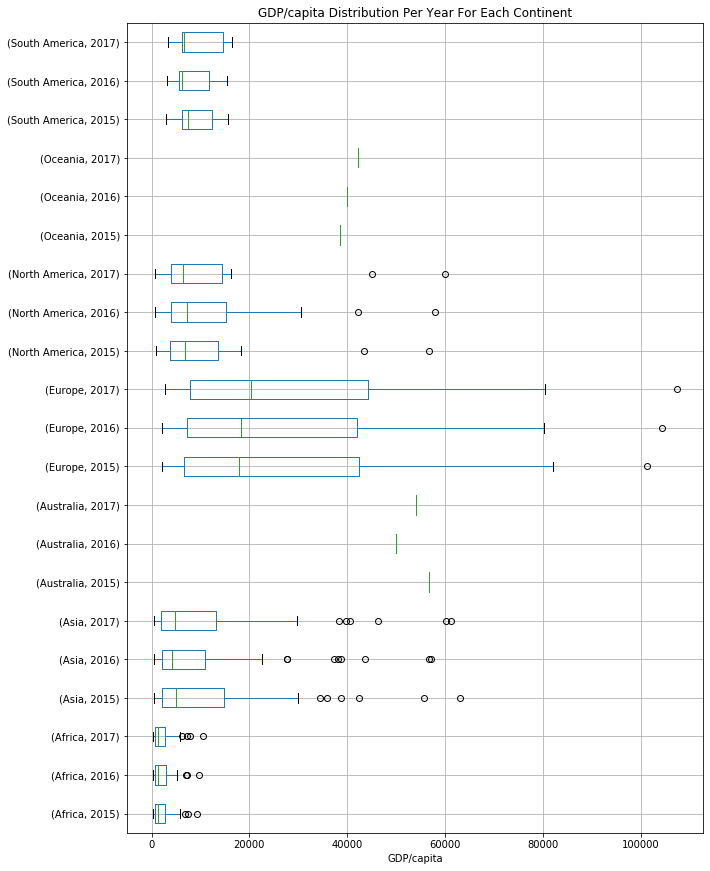

In [33]:
dataset.boxplot(column=['n_GDP/c'], by=['Continent','Year'], figsize=(10, 15), vert=False)
plt.title("GDP/capita Distribution Per Year For Each Continent")
plt.xlabel('GDP/capita')
plt.suptitle("")
plt.show()

### 1.1.2 Plot GDP/capita for each region


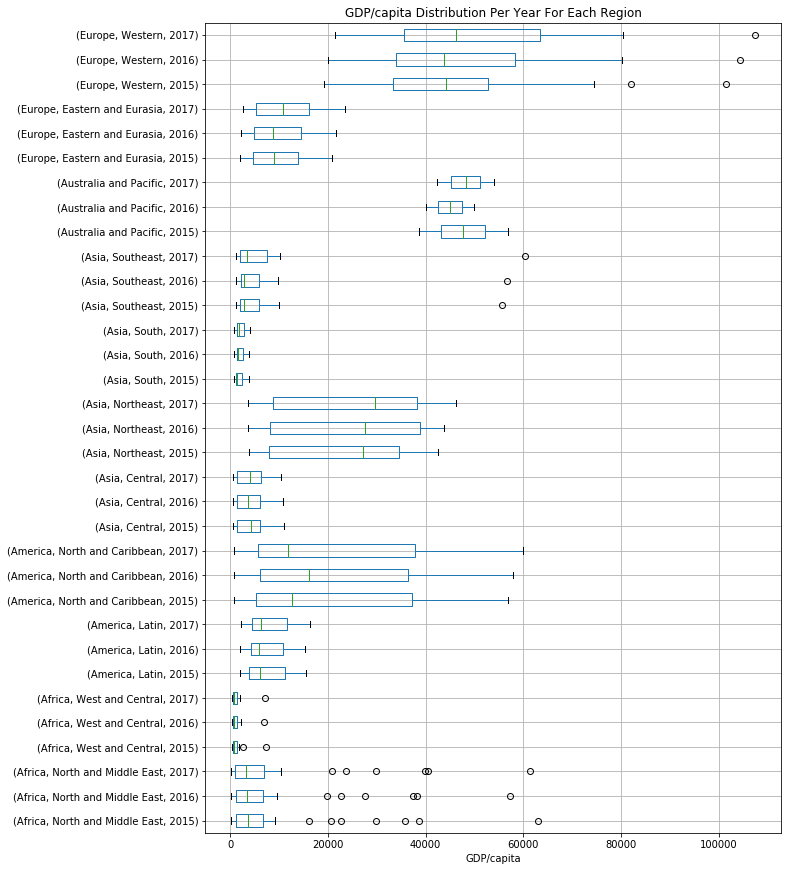

In [34]:
dataset.boxplot(column=['n_GDP/c'], by=['RegionName','Year'], figsize=(10, 15), vert=False)
plt.title("GDP/capita Distribution Per Year For Each Region")
plt.xlabel('GDP/capita')
plt.suptitle("")
plt.show()

### 1.1.3 Plot GDP/capita for each continent-region

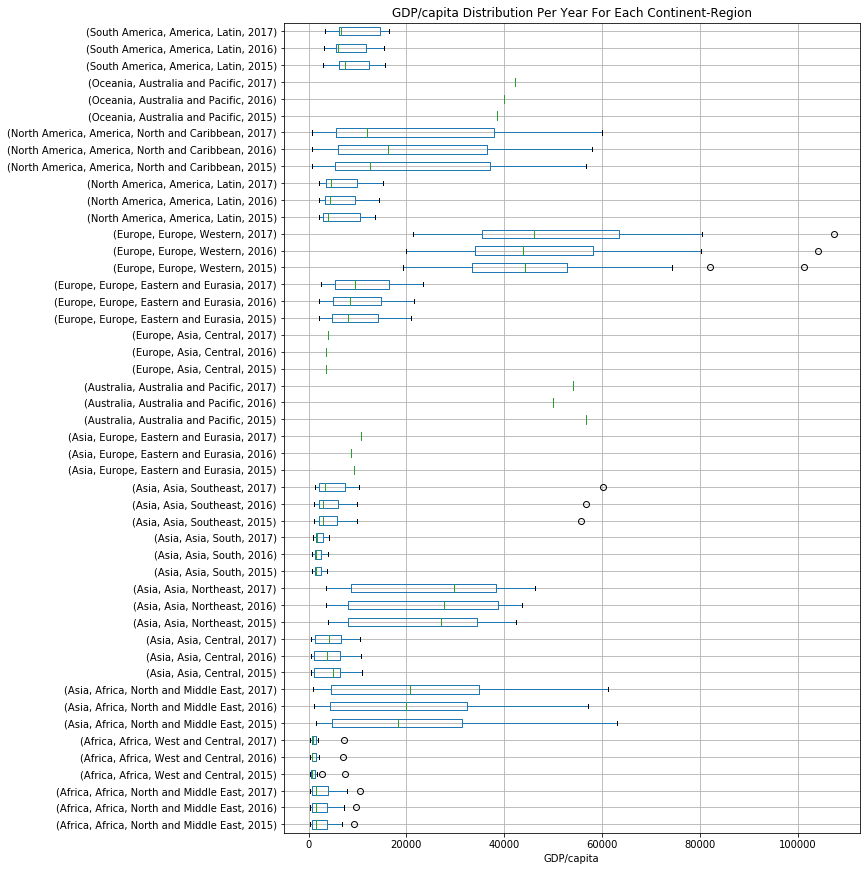

In [37]:
#boxplot of gdp/capita for each continent-region in each year
dataset.boxplot(column=['n_GDP/c'], by=['Continent', 'RegionName','Year'], figsize=(10, 15), vert=False)
plt.title("GDP/capita Distribution Per Year For Each Continent-Region")
plt.xlabel('GDP/capita')
plt.suptitle("")
plt.show()

### 1.1.4 Plot total life expectancies for each continent-region

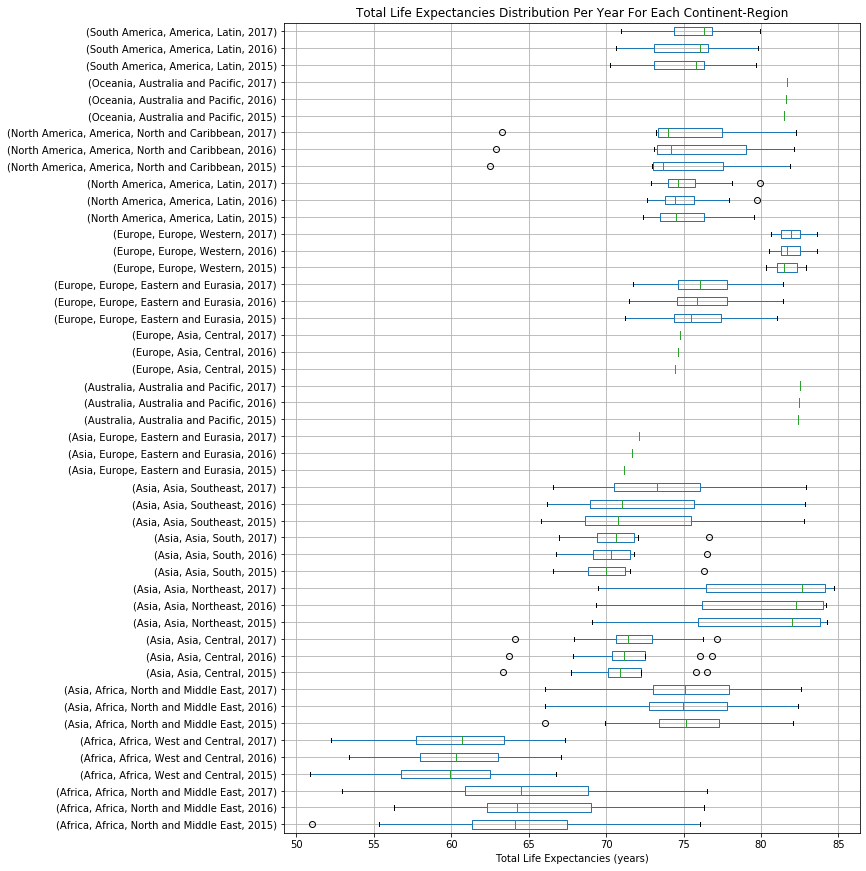

In [38]:
#boxplot of total life expectancies for each continent-region in each year
dataset.boxplot(column=['total_lifeexp'], by=['Continent', 'RegionName','Year'], figsize=(10, 15), vert=False)
plt.title("Total Life Expectancies Distribution Per Year For Each Continent-Region")
plt.xlabel('Total Life Expectancies (years)')
plt.suptitle("")
plt.show()

### 1.2 Remove outliers and re-plot

In [39]:
#merge continent and region name as a tupple in df2
dataset.loc[:, 'con_reg'] = tuple(dataset['Continent'] + '_' + dataset['RegionName'])

### 1.2.1 Plot GDP/capita for each continent without outliers
Since gdp distribution is non-normal, use IQR instead  of z-score to remove outliers

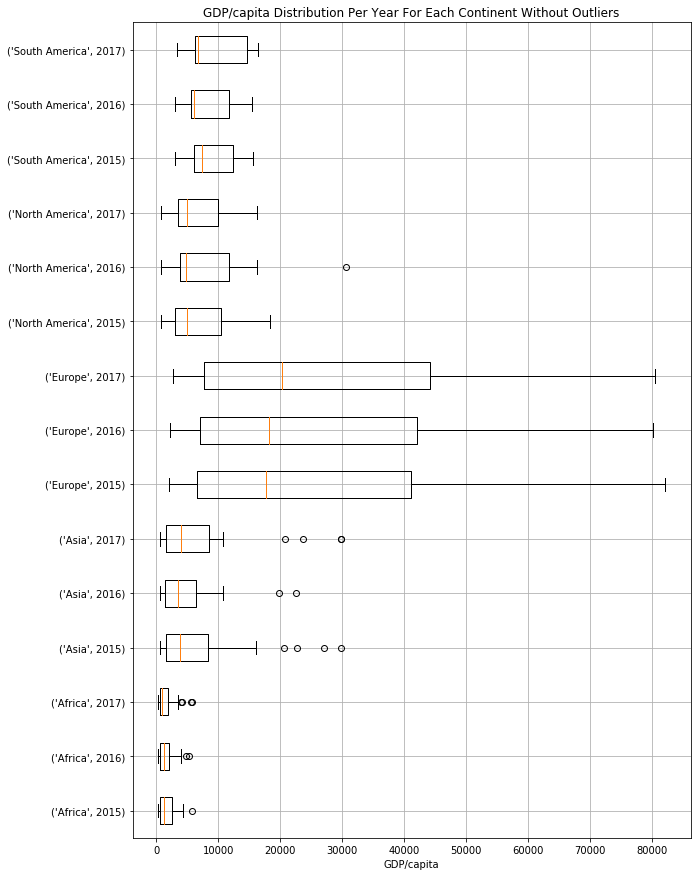

In [40]:
data_con = []
label_con_yr = []

#sort_values to show in the same order as previous plots
continent = list(dataset['Continent'].sort_values(ascending = True).unique())
year = list(dataset['Year'].unique())

for c in range(len(continent)):
    for y in range(len(year)):
        temp_d = dataset.loc[dataset['Continent']==continent[c]].loc[dataset['Year']==year[y]]['n_GDP/c']
        if len(temp_d) >1:
            q1 = temp_d.quantile(0.25)
            q3 = temp_d.quantile(0.75)
            iqr = q3-q1
            upper = q3 + (1.5*iqr)
            lower = q1 - (1.5*iqr)
            data_con.append(temp_d[(temp_d < upper) & (temp_d > lower)])
            label_con_yr.append(tuple([continent[c],year[y]]))
            
            
plt.figure(figsize = (10, 15))        
plt.boxplot(data_con, labels = label_con_yr, vert = False)
plt.title('GDP/capita Distribution Per Year For Each Continent Without Outliers')
plt.xlabel('GDP/capita')
plt.grid()
plt.show()

### 1.2.2 Plot GDP/capita for each region without outliers


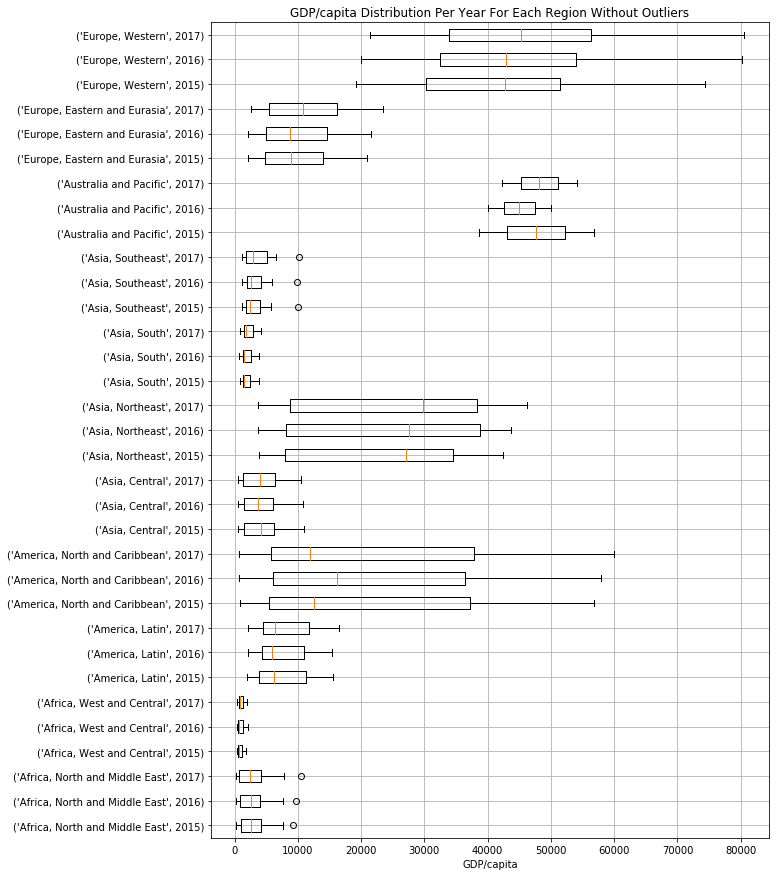

In [41]:
data_reg = []
label_reg_yr = []

#sort_values to show in the same order as previous plots
region = list(dataset['RegionName'].sort_values(ascending = True).unique())
year = list(dataset['Year'].unique())

for r in range(len(region)):
    for y in range(len(year)):
        temp_d = dataset.loc[dataset['RegionName']==region[r]].loc[dataset['Year']==year[y]]['n_GDP/c']
        if len(temp_d) >1:
            q1 = temp_d.quantile(0.25)
            q3 = temp_d.quantile(0.75)
            iqr = q3-q1
            upper = q3 + (1.5*iqr)
            lower = q1 - (1.5*iqr)
            data_reg.append(temp_d[(temp_d < upper) & (temp_d > lower)])
            label_reg_yr.append(tuple([region[r],year[y]]))
    
            
plt.figure(figsize = (10, 15))        
plt.boxplot(data_reg, labels = label_reg_yr, vert = False)
plt.title('GDP/capita Distribution Per Year For Each Region Without Outliers')
plt.xlabel('GDP/capita')
plt.grid()
plt.show()

### 1.2.3 Plot GDP/capita for each continent-region without outliers 

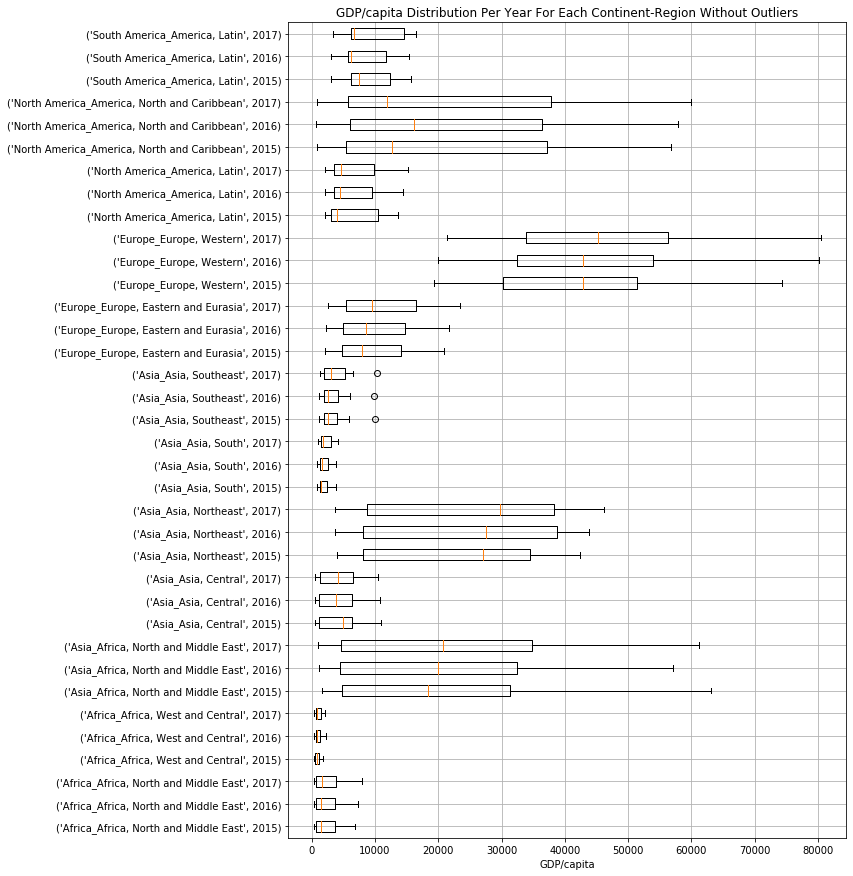

In [42]:
data_conreg = []
label_conreg_yr = []

#sort_values to show in the same order as previous plots
continent_region = list(dataset['con_reg'].sort_values(ascending = True).unique())
year = list(dataset['Year'].unique())

for cr in range(len(continent_region)):
    for y in range(len(year)):
        temp_d = dataset.loc[dataset['con_reg']==continent_region[cr]].loc[dataset['Year']==year[y]]['n_GDP/c']
        if len(temp_d) >1:
            q1 = temp_d.quantile(0.25)
            q3 = temp_d.quantile(0.75)
            iqr = q3-q1
            upper = q3 + (1.5*iqr)
            lower = q1 - (1.5*iqr)
            data_conreg.append(temp_d[(temp_d < upper) & (temp_d > lower)])
            label_conreg_yr.append(tuple([continent_region[cr],year[y]]))
            
            
plt.figure(figsize = (10, 15))        
plt.boxplot(data_conreg, labels = label_conreg_yr, vert = False)
plt.title('GDP/capita Distribution Per Year For Each Continent-Region Without Outliers')
plt.xlabel('GDP/capita')
plt.grid()
plt.show()

Conclusion: Removing outliers when data are grouped by continent-region seems to produce better results. Asia_Asia, Southeast still has outlier; the upper limit of IQR*1.5 did not cover the 2nd set of outlier even though they are close to each other.  

### 1.2.4 Plot total life expectancies for each continent-region without outliers 

From the GDP/capita section, we noticed that removing outliers is more effective when done in the continent-region level instead of either continent or region. Thus, for the total life expectancies, we will only be conducting outlier removal on continent-region. 

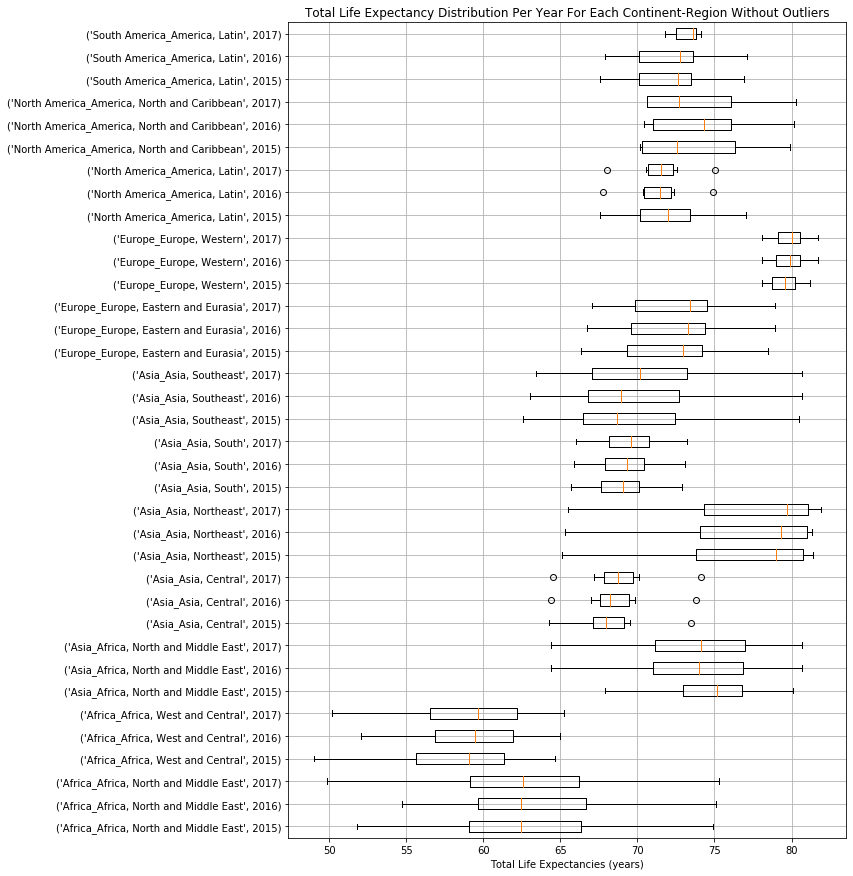

In [43]:
data_life = []
label_life_yr = []

#sort_values to show in the same order as previous plots
continent_region = list(dataset['con_reg'].sort_values(ascending = True).unique())
year = list(dataset['Year'].unique())

for cr in range(len(continent_region)):
    for y in range(len(year)):
        temp_d = dataset.loc[dataset['con_reg']==continent_region[cr]].loc[dataset['Year']==year[y]]['m_lifeexp']
        if len(temp_d) >1:
            q1 = temp_d.quantile(0.25)
            q3 = temp_d.quantile(0.75)
            iqr = q3-q1
            upper = q3 + (1.5*iqr)
            lower = q1 - (1.5*iqr)
            data_life.append(temp_d[(temp_d < upper) & (temp_d > lower)])
            label_life_yr.append(tuple([continent_region[cr],year[y]]))
                
                
plt.figure(figsize = (10, 15))        
plt.boxplot(data_life, labels = label_life_yr, vert = False)
plt.title('Total Life Expectancy Distribution Per Year For Each Continent-Region Without Outliers')
plt.xlabel('Total Life Expectancies (years)')
plt.grid()
plt.show()

There are some outliers left after removing those outside the (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR) limit. This could be due to female and male variations in life expectancies in these continent that is projected as total life expectancies. It could also be due to big clusters of continent-region groups that are close to each other and 1 or 2 that are far from the clusters. Removing 1 group that is far might not removed the remaining, as observed in section 1.2.3; GDP/capita for each continent-region.  

### 1.2.4 Create 'dataset2' containing no GDP/capita outliers

In [49]:
dataset2 = pd.DataFrame()
columns = ['Country_x', 'Happiness Score', 'Happiness Rank', 'Year', 'n_GDP/c', 'Continent', 'RegionName', 'total_lifeexp']
for lst in data_conreg:
    for j in lst.index:
        dataset2 = dataset2.append(dataset.loc[j, columns])
        
        
dataset2.head()

,Continent,Country_x,Happiness Rank,Happiness Score,RegionName,Year,n_GDP/c,total_lifeexp
62,Africa,Libya,63.0,5.754,"Africa, North and Middle East",2015.0,4337.919139,72.121
67,Africa,Algeria,68.0,5.605,"Africa, North and Middle East",2015.0,4177.867517,76.090
84,Africa,Zambia,85.0,5.129,"Africa, North and Middle East",2015.0,1337.796315,61.737
91,Africa,Morocco,92.0,5.013,"Africa, North and Middle East",2015.0,2875.257985,75.726
93,Africa,Mozambique,94.0,4.971,"Africa, North and Middle East",2015.0,589.859028,57.206


In [50]:
#check the length of data_conreg = length of dataset2
x = []
for lst in data_conreg:
    x.append(len(lst))
print('Length of data_conreg: ', sum(x))
print('Length of dataset2: ', len(dataset2))

Length of data_conreg:  428
Length of dataset2:  428


### 1.3 Compare data before and after removing outliers

### 1.3.1 Get 5 countries with highest GPD/capita before and after removing outliers

In [51]:
#before removing outliers
gdp_high = pd.DataFrame()
for i in dataset['Year'].unique():
    gdp_high = gdp_high.append(dataset[dataset['Year'] == i].sort_values(by = ['n_GDP/c', 'Happiness Score'], 
        ascending = False).head()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 countries with highest GDP/capita: (before removing outliers)')    
display(gdp_high)  

 5 countries with highest GDP/capita: (before removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
16,2015,Luxembourg,Europe,"Europe, Western",101376.49660,17
0,2015,Switzerland,Europe,"Europe, Western",82081.60921,1
3,2015,Norway,Europe,"Europe, Western",74355.51586,4
27,2015,Qatar,Asia,"Africa, North and Middle East",63039.01655,28
17,2015,Ireland,Europe,"Europe, Western",61995.42278,18
177,2016,Luxembourg,Europe,"Europe, Western",104278.39100,20
159,2016,Switzerland,Europe,"Europe, Western",80172.19330,2
161,2016,Norway,Europe,"Europe, Western",70460.56053,4
176,2016,Ireland,Europe,"Europe, Western",63197.08237,19
160,2016,Iceland,Europe,"Europe, Western",61757.94931,3


In [52]:
#after removing outliers
gdp_high_rem = pd.DataFrame()
for i in dataset2['Year'].unique():
    gdp_high_rem = gdp_high_rem.append(dataset2[dataset2['Year'] == i].sort_values(by = ['n_GDP/c', 'Happiness Score'], 
        ascending = False).head()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 countries with highest GDP/capita: (after removing outliers)')    
display(gdp_high_rem) 

 5 countries with highest GDP/capita: (after removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
3,2015.0,Norway,Europe,"Europe, Western",74355.51586,4.0
27,2015.0,Qatar,Asia,"Africa, North and Middle East",63039.01655,28.0
17,2015.0,Ireland,Europe,"Europe, Western",61995.42278,18.0
14,2015.0,United States,North America,"America, North and Caribbean",56803.47243,15.0
2,2015.0,Denmark,Europe,"Europe, Western",53254.85600,3.0
159,2016.0,Switzerland,Europe,"Europe, Western",80172.19330,2.0
161,2016.0,Norway,Europe,"Europe, Western",70460.56053,4.0
176,2016.0,Ireland,Europe,"Europe, Western",63197.08237,19.0
160,2016.0,Iceland,Europe,"Europe, Western",61757.94931,3.0
170,2016.0,United States,North America,"America, North and Caribbean",57904.20196,13.0


### 1.3.2 Get 5 happiest countries before and after removing outliers

In [53]:
#before removing outliers
hap_high = pd.DataFrame()
for i in dataset['Year'].unique():
    hap_high = hap_high.append(dataset[dataset['Year'] == i].sort_values(by = ['Happiness Score', 'n_GDP/c'], 
        ascending = False).head()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 happiest countries: (before removing outliers)')    
display(hap_high)  

 5 happiest countries: (before removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
0,2015,Switzerland,Europe,"Europe, Western",82081.60921,1
1,2015,Iceland,Europe,"Europe, Western",52428.59576,2
2,2015,Denmark,Europe,"Europe, Western",53254.85600,3
3,2015,Norway,Europe,"Europe, Western",74355.51586,4
4,2015,Canada,North America,"America, North and Caribbean",43495.05439,5
158,2016,Denmark,Europe,"Europe, Western",54663.99837,1
159,2016,Switzerland,Europe,"Europe, Western",80172.19330,2
160,2016,Iceland,Europe,"Europe, Western",61757.94931,3
161,2016,Norway,Europe,"Europe, Western",70460.56053,4
162,2016,Finland,Europe,"Europe, Western",43777.44009,5


In [54]:
#after removing outliers
hap_high_rem = pd.DataFrame()
for i in dataset2['Year'].unique():
    hap_high_rem = hap_high_rem.append(dataset2[dataset2['Year'] == i].sort_values(by = ['Happiness Score', 'n_GDP/c'], 
        ascending = False).head()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 happiest countries: (after removing outliers)')    
display(hap_high_rem) 

 5 happiest countries: (after removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
1,2015.0,Iceland,Europe,"Europe, Western",52428.59576,2.0
2,2015.0,Denmark,Europe,"Europe, Western",53254.85600,3.0
3,2015.0,Norway,Europe,"Europe, Western",74355.51586,4.0
4,2015.0,Canada,North America,"America, North and Caribbean",43495.05439,5.0
5,2015.0,Finland,Europe,"Europe, Western",42811.21299,6.0
158,2016.0,Denmark,Europe,"Europe, Western",54663.99837,1.0
159,2016.0,Switzerland,Europe,"Europe, Western",80172.19330,2.0
160,2016.0,Iceland,Europe,"Europe, Western",61757.94931,3.0
161,2016.0,Norway,Europe,"Europe, Western",70460.56053,4.0
162,2016.0,Finland,Europe,"Europe, Western",43777.44009,5.0


### 1.3.3 Get 5 countries with lowest GPD/capita before and after removing outliers 

In [55]:
#before removing outliers
gdp_low = pd.DataFrame()
for i in dataset['Year'].unique():
    gdp_low = gdp_low.append(dataset[(dataset['Year'] == i) & (~dataset['n_GDP/c'].isna())].sort_values(by = ['n_GDP/c', 'Happiness Score'], 
        ascending = False).tail()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 countries with lowest GDP/capita: (before removing outliers)')    
display(gdp_low)  

 5 countries with lowest GDP/capita: (before removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
146,2015,Madagascar,Africa,"Africa, North and Middle East",467.235277,147
130,2015,Malawi,Africa,"Africa, North and Middle East",380.597033,131
147,2015,Central African Republic,Africa,"Africa, West and Central",377.271254,148
143,2015,Niger,Africa,"Africa, West and Central",360.853384,144
156,2015,Burundi,Africa,"Africa, North and Middle East",305.549773,157
282,2016,"Congo, Democratic Republic of",Africa,"Africa, West and Central",471.318840,125
299,2016,Niger,Africa,"Africa, West and Central",362.131132,142
289,2016,Malawi,Africa,"Africa, North and Middle East",315.777326,132
233,2016,Somalia,Africa,"Africa, North and Middle East",295.967852,76
314,2016,Burundi,Africa,"Africa, North and Middle East",282.193130,157


In [56]:
#after removing outliers
gdp_low_rem = pd.DataFrame()
for i in dataset2['Year'].unique():
    gdp_low_rem = gdp_low_rem.append(dataset2[(dataset2['Year'] == i) & (~dataset2['n_GDP/c'].isna())].sort_values(by = ['n_GDP/c', 'Happiness Score'], 
        ascending = False).tail()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 countries with lowest GDP/capita: (after removing outliers)')    
display(gdp_low_rem)  

 5 countries with lowest GDP/capita: (after removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
146,2015.0,Madagascar,Africa,"Africa, North and Middle East",467.235277,147.0
130,2015.0,Malawi,Africa,"Africa, North and Middle East",380.597033,131.0
147,2015.0,Central African Republic,Africa,"Africa, West and Central",377.271254,148.0
143,2015.0,Niger,Africa,"Africa, West and Central",360.853384,144.0
156,2015.0,Burundi,Africa,"Africa, North and Middle East",305.549773,157.0
282,2016.0,"Congo, Democratic Republic of",Africa,"Africa, West and Central",471.318840,125.0
299,2016.0,Niger,Africa,"Africa, West and Central",362.131132,142.0
289,2016.0,Malawi,Africa,"Africa, North and Middle East",315.777326,132.0
233,2016.0,Somalia,Africa,"Africa, North and Middle East",295.967852,76.0
314,2016.0,Burundi,Africa,"Africa, North and Middle East",282.193130,157.0


In [57]:
print('Are 5 countries with lowerst GDP/capita the same before and after removing outliers: ', all(gdp_low == gdp_low_rem))

Are 5 countries with lowerst GDP/capita the same before and after removing outliers:  True


### 1.3.4 Get 5 unhappiest countries before and after removing outliers 

In [58]:
#before removing outliers
hap_low = pd.DataFrame()
for i in dataset['Year'].unique():
    hap_low = hap_low.append(dataset[(dataset['Year'] == i) & (~dataset['n_GDP/c'].isna())].sort_values(by = ['Happiness Score','n_GDP/c'], 
        ascending = False).tail()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 unhappiest countries: (before removing outliers)')    
display(hap_low)

 5 unhappiest countries: (before removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
152,2015,Afghanistan,Asia,"Asia, Central",578.466353,153
153,2015,Rwanda,Africa,"Africa, North and Middle East",728.081879,154
154,2015,Benin,Africa,"Africa, West and Central",784.278407,155
156,2015,Burundi,Africa,"Africa, North and Middle East",305.549773,157
157,2015,Togo,Africa,"Africa, West and Central",570.680737,158
309,2016,Rwanda,Africa,"Africa, North and Middle East",726.347974,152
310,2016,Benin,Africa,"Africa, West and Central",789.084915,153
311,2016,Afghanistan,Asia,"Asia, Central",547.228110,154
312,2016,Togo,Africa,"Africa, West and Central",597.065459,155
314,2016,Burundi,Africa,"Africa, North and Middle East",282.193130,157


In [59]:
#after removing outliers
hap_low_rem = pd.DataFrame()
for i in dataset2['Year'].unique():
    hap_low_rem = hap_low_rem.append(dataset2[(dataset2['Year'] == i) & (~dataset2['n_GDP/c'].isna())].sort_values(by = ['Happiness Score','n_GDP/c'], 
        ascending = False).tail()[['Year', 'Country_x', 'Continent', 'RegionName', 'n_GDP/c', 'Happiness Rank']])

print('\033[1m','5 unhappiest countries: (after removing outliers)')    
display(hap_low_rem) 

 5 unhappiest countries: (after removing outliers)


,Year,Country_x,Continent,RegionName,n_GDP/c,Happiness Rank
152,2015.0,Afghanistan,Asia,"Asia, Central",578.466353,153.0
153,2015.0,Rwanda,Africa,"Africa, North and Middle East",728.081879,154.0
154,2015.0,Benin,Africa,"Africa, West and Central",784.278407,155.0
156,2015.0,Burundi,Africa,"Africa, North and Middle East",305.549773,157.0
157,2015.0,Togo,Africa,"Africa, West and Central",570.680737,158.0
309,2016.0,Rwanda,Africa,"Africa, North and Middle East",726.347974,152.0
310,2016.0,Benin,Africa,"Africa, West and Central",789.084915,153.0
311,2016.0,Afghanistan,Asia,"Asia, Central",547.228110,154.0
312,2016.0,Togo,Africa,"Africa, West and Central",597.065459,155.0
314,2016.0,Burundi,Africa,"Africa, North and Middle East",282.193130,157.0


In [60]:
print('Are 5 unhappiest countries the same before and after removing outliers: ', all(hap_low == hap_low_rem))

Are 5 unhappiest countries the same before and after removing outliers:  True


From the boxplots, outliers were observed on the higher end of the distribution tail. Thus, only the higher end of the outliers were removed. The results were different only for the top 5 happiest and has highest GDP/capita countries. The 5 unhappiest and has lowest GPD/capita countries remained the same. 

### 1.3.5 Scatter Plot for Happiness Score and GDP/capita

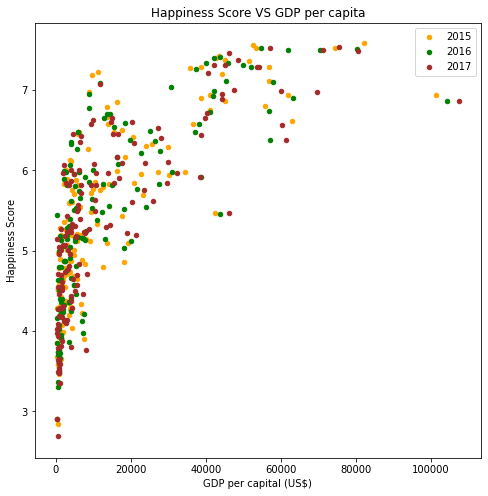

In [61]:
#before removing outliers
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

ax.scatter(x = dataset[dataset['Year']==2015]['n_GDP/c'], y = dataset[dataset['Year']==2015]['Happiness Score'], s =20, c='orange')
ax.scatter(x = dataset[dataset['Year']==2016]['n_GDP/c'], y = dataset[dataset['Year']==2016]['Happiness Score'], s =20, c='green')
ax.scatter(x = dataset[dataset['Year']==2017]['n_GDP/c'], y = dataset[dataset['Year']==2017]['Happiness Score'], s =20, c='brown')

plt.xlabel('GDP per capital (US$)')
plt.ylabel('Happiness Score')
plt.legend([2015,2016,2017])
plt.title('Happiness Score VS GDP per capita')
plt.show()

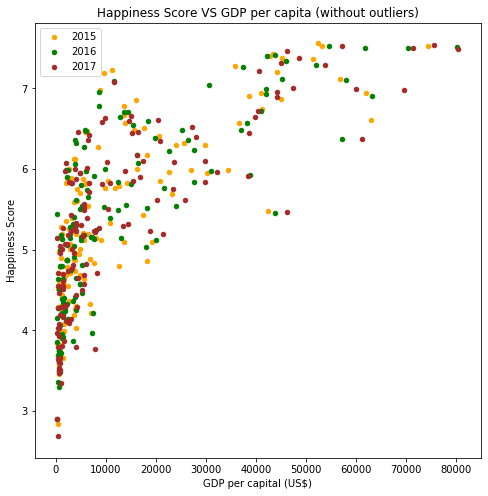

In [62]:
#after removing outliers
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

ax.scatter(x = dataset2[dataset2['Year']==2015]['n_GDP/c'], y = dataset2[dataset2['Year']==2015]['Happiness Score'], s =20, c='orange')
ax.scatter(x = dataset2[dataset2['Year']==2016]['n_GDP/c'], y = dataset2[dataset2['Year']==2016]['Happiness Score'], s =20, c='green')
ax.scatter(x = dataset2[dataset2['Year']==2017]['n_GDP/c'], y = dataset2[dataset2['Year']==2017]['Happiness Score'], s =20, c='brown')

plt.xlabel('GDP per capital (US$)')
plt.ylabel('Happiness Score')
plt.legend([2015,2016,2017])
plt.title('Happiness Score VS GDP per capita (without outliers)')
plt.show()

The scatter plot for happiness score and GDP/capita looked similar with or without removing outliers. Thus, the outliers does not seem to be significantly influential. The trend between these variables seems to be curvilinear. Happiness scores increase as GDP/capita increase but only within a certain range.

### 1.3.6 Create 'dataset3' containing no outliers in total_lifeexp

In [63]:
dataset3 = pd.DataFrame()
columns = ['Country_x', 'Happiness Score', 'Happiness Rank', 'Year', 'n_GDP/c', 'Continent', 'RegionName', 'total_lifeexp']
for lst in data_life:
    for j in lst.index:
        dataset3 = dataset3.append(dataset.loc[j, columns])
        
        
dataset3.head()

,Continent,Country_x,Happiness Rank,Happiness Score,RegionName,Year,n_GDP/c,total_lifeexp
62,Africa,Libya,63.0,5.754,"Africa, North and Middle East",2015.0,4337.919139,72.121000
67,Africa,Algeria,68.0,5.605,"Africa, North and Middle East",2015.0,4177.867517,76.090000
70,Africa,Mauritius,71.0,5.477,"Africa, North and Middle East",2015.0,9260.447303,74.353171
84,Africa,Zambia,85.0,5.129,"Africa, North and Middle East",2015.0,1337.796315,61.737000
91,Africa,Morocco,92.0,5.013,"Africa, North and Middle East",2015.0,2875.257985,75.726000


In [64]:
#check the length of data_life == length of dataset3
x = []
for lst in data_life:
    x.append(len(lst))
print('Length of data_conreg: ', sum(x))
print('Length of dataset3: ', len(dataset3))

Length of data_conreg:  433
Length of dataset3:  433


### 1.3.7 Scatter Plot for Happiness Score and Total Life Expectancies

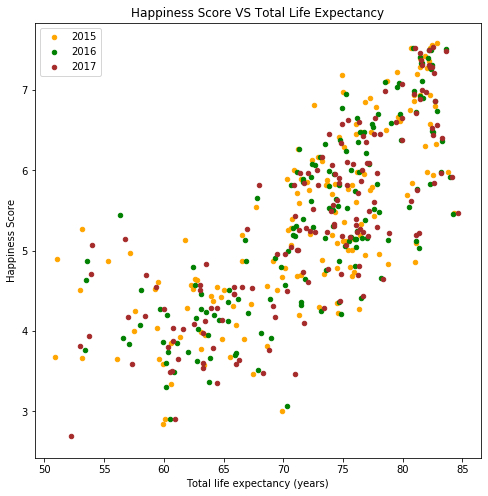

In [65]:
#before removing outliers
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(x = dataset[dataset['Year']==2015]['total_lifeexp'], y = dataset[dataset['Year']==2015]['Happiness Score'],s =20, c='orange')
ax.scatter(x = dataset[dataset['Year']==2016]['total_lifeexp'], y = dataset[dataset['Year']==2016]['Happiness Score'],s =20, c='green')
ax.scatter(x = dataset[dataset['Year']==2017]['total_lifeexp'], y = dataset[dataset['Year']==2017]['Happiness Score'],s=20,  c='brown')

plt.xlabel('Total life expectancy (years)')
plt.ylabel('Happiness Score')
plt.legend([2015,2016,2017])
plt.title('Happiness Score VS Total Life Expectancy')
plt.show()

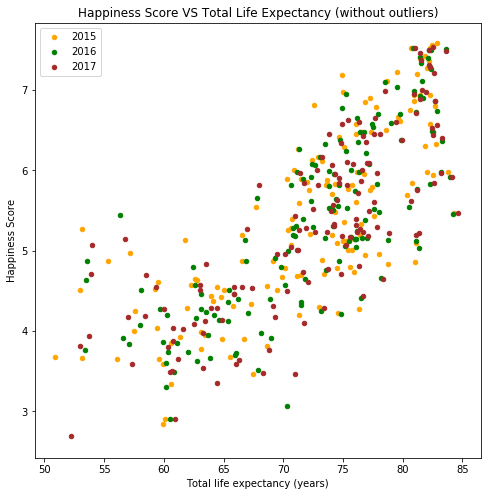

In [66]:
#after removing outliers
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(x = dataset3[dataset3['Year']==2015]['total_lifeexp'], y = dataset3[dataset3['Year']==2015]['Happiness Score'],s =20, c='orange')
ax.scatter(x = dataset3[dataset3['Year']==2016]['total_lifeexp'], y = dataset3[dataset3['Year']==2016]['Happiness Score'],s =20, c='green')
ax.scatter(x = dataset3[dataset3['Year']==2017]['total_lifeexp'], y = dataset3[dataset3['Year']==2017]['Happiness Score'],s=20,  c='brown')

plt.xlabel('Total life expectancy (years)')
plt.ylabel('Happiness Score')
plt.legend([2015,2016,2017])
plt.title('Happiness Score VS Total Life Expectancy (without outliers)')
plt.show()

The scatter plot for happiness score and total life expectancies looked similar with or without removing outliers. Thus, the outliers does not seem to be significantly influential. There seems to be a positive linear trend between total life expectancies and happiness scores. 

## 2. Happiness Data

### 2.1 Exploring happiness data 

### 2.1.1 Pairplot using seaborn for interested variables:


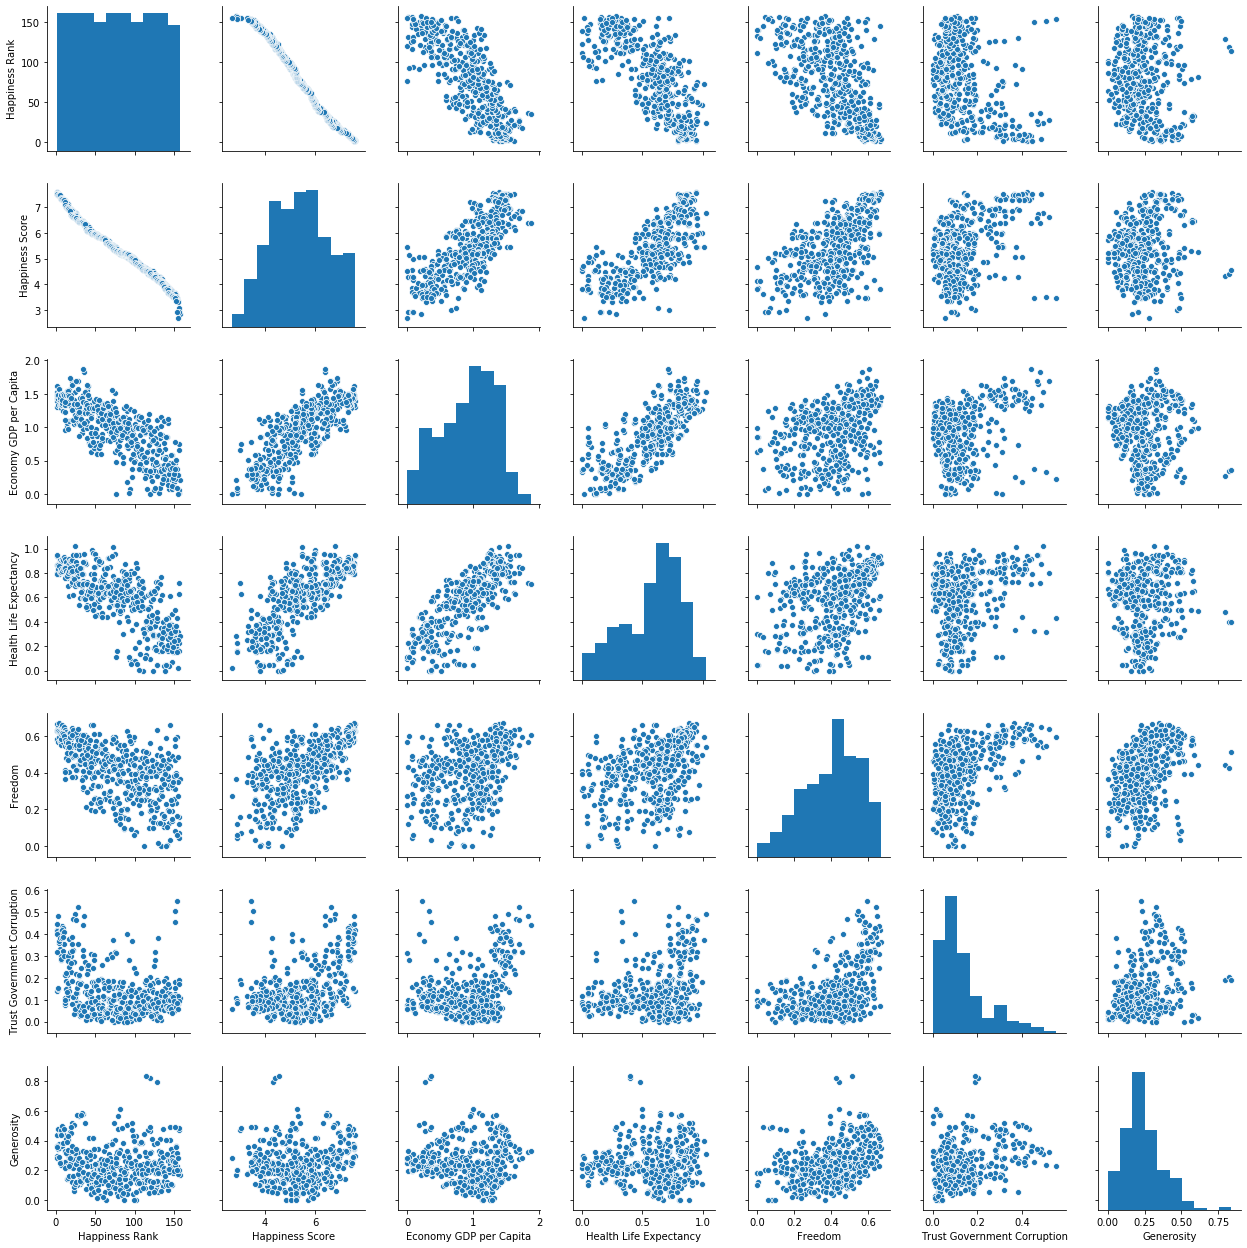

In [67]:
#variables of interest:
df_c_to_g = dataset.loc[:,['Country_x','Religion','Continent','RegionName',
                           'Happiness Rank','Happiness Score','Economy GDP per Capita',
                           'Health Life Expectancy','Freedom','Trust Government Corruption','Generosity']]
df_c_to_g = df_c_to_g.rename(columns={'Country_x':'Country'})

sns.pairplot(df_c_to_g)

#### Correlations Between Happiness Rank, Happiness Score, Economy GDP per Capita, Health Life Expectancy, Freedom, Trust Government Corruption, and Generosity

We see there is a strong relationship between Happiness and GDP per Capita, Life Expectancy, and Freedom. It is possible that other variables can have a relationship with happiness if they were transformed; however, this is outside of our scope for this project. We will only look at the variables that we see have inmediate correlation.

### 2.1.2 Scatter Plot for Happiness and Freedom Scores

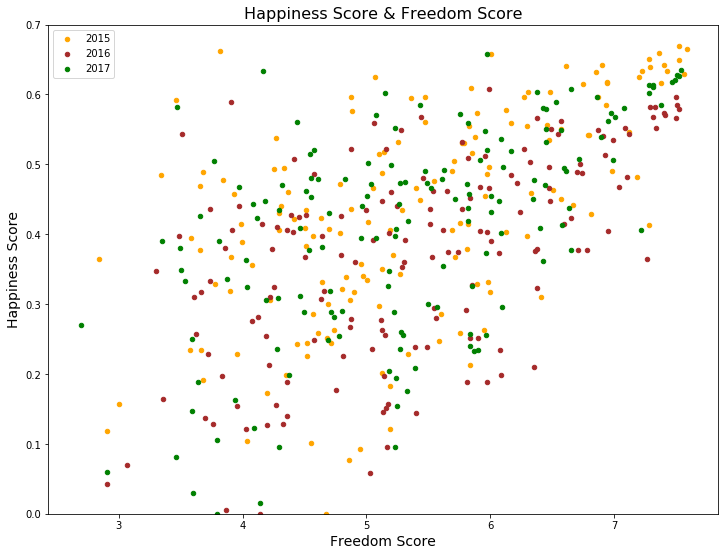

In [68]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
ax.scatter(dataset[(dataset['Year']==2015)]['Happiness Score'],dataset[(dataset['Year']==2015)]['Freedom'],s=20, c='orange')
ax.scatter(dataset[(dataset['Year']==2016)]['Happiness Score'],dataset[(dataset['Year']==2016)]['Freedom'],s=20, c='brown')
ax.scatter(dataset[(dataset['Year']==2017)]['Happiness Score'],dataset[(dataset['Year']==2017)]['Freedom'],s=20, c='green')
plt.title('Happiness Score & Freedom Score',fontsize=16)
plt.xlabel('Freedom Score',fontsize=14)
plt.ylabel('Happiness Score',fontsize=14)
plt.ylim(0,0.7)
ax.legend([2015,2016,2017])
plt.show()

### 2.1.3 Happiness Score distribution for 2015-2017

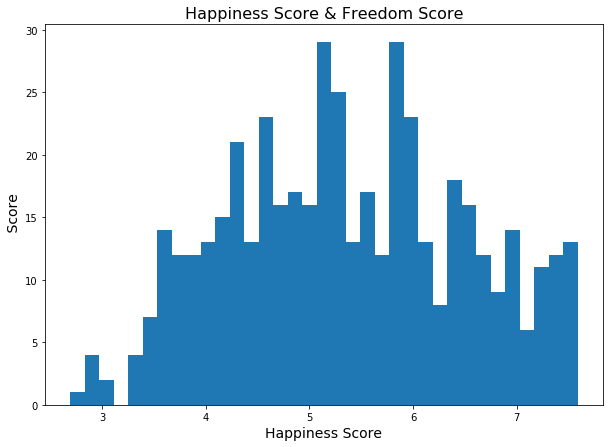

In [69]:
plt.figure(figsize=(10,7))
dataset['Happiness Score'].plot.hist(bins=35)
plt.title('Happiness Score & Freedom Score',fontsize=16)
plt.xlabel('Happiness Score',fontsize=14)
plt.ylabel(' Score',fontsize=14)
plt.show()

### 2.1.4 Average happiness score for each regions 

In [70]:
happiness_throughout_years = dataset.groupby(['RegionName','Year'])[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=True)
display(happiness_throughout_years.unstack(), happiness_throughout_years)

Happiness Score                    
Year                                     2015      2016      2017
RegionName                                                       
Africa, North and Middle East        4.866842  4.765250  4.715838
Africa, West and Central             4.012368  4.039500  4.090105
America, Latin                       6.327944  6.239053  6.153333
America, North and Caribbean         5.971000  6.058286  5.770167
Asia, Central                        5.063300  5.095800  5.125300
Asia, Northeast                      5.626167  5.624167  5.646667
Asia, South                          4.748500  4.763833  4.767500
Asia, Southeast                      5.317444  5.338889  5.444875
Australia and Pacific                7.285000  7.323500  7.299000
Europe, Eastern and Eurasia          5.324870  5.364652  5.428174
Europe, Western                      6.838421  6.820789  6.828474

Happiness Score
RegionName                    Year                 
Africa, West and Central      2015         4.012368
                              2016         4.039500
                              2017         4.090105
Africa, North and Middle East 2017         4.715838
Asia, South                   2015         4.748500
                              2016         4.763833
Africa, North and Middle East 2016         4.765250
Asia, South                   2017         4.767500
Africa, North and Middle East 2015         4.866842
Asia, Central                 2015         5.063300
                              2016         5.095800
                              2017         5.125300
Asia, Southeast               2015         5.317444
Europe, Eastern and Eurasia   2015         5.324870
Asia, Southeast               2016         5.338889
Europe, Eastern and Eurasia   2016         5.364652
                              2017         5.428174
Asia, Southeast               2017         5.444875
Asia, Northeast               2016         5.624167
                              2015         5.626167
                              2017         5.646667
America, North and Caribbean  2017         5.770167
                              2015         5.971000
                              2016         6.058286
America, Latin                2017         6.153333
                              2016         6.239053
                              2015         6.327944
Europe, Western               2016         6.820789
                              2017         6.828474
                              2015         6.838421
Australia and Pacific         2015         7.285000
                              2017         7.299000
                              2016         7.323500

#### In our filtering, we see that calling the function ".unstack()" makes our groupby table easier to read and helps our graphs also be visually friendly. 

### 2.1.5 Happiness and Trust Government Corruption Scores for each region

Text(0, 0.5, 'Trust Government Corruption Score')

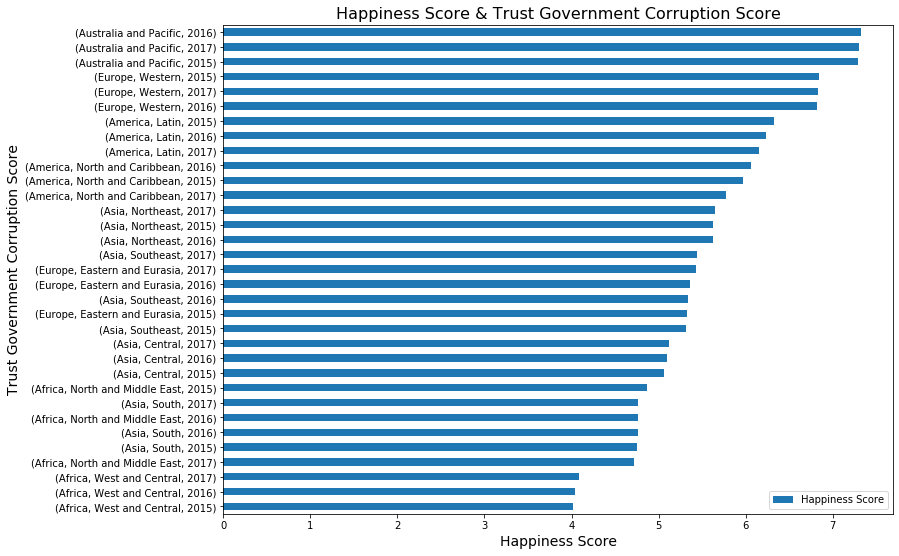

In [71]:
#did not use 'unstack()'
happiness_throughout_years.plot.barh(figsize=(12, 9))
plt.title('Happiness Score & Trust Government Corruption Score',fontsize=16)
plt.xlabel('Happiness Score',fontsize=14)
plt.ylabel('Trust Government Corruption Score',fontsize=14)

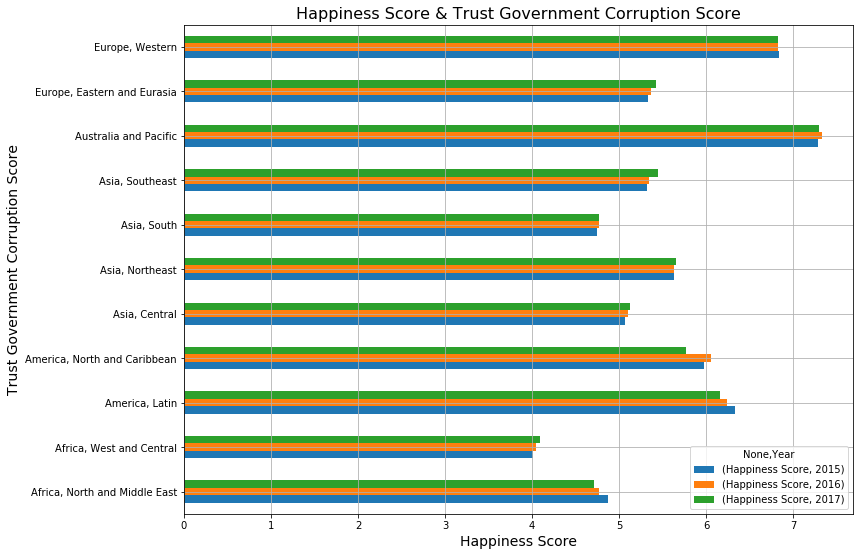

In [72]:
#using 'unstack()'
happiness_throughout_years.unstack().plot.barh(figsize=(12, 9))
plt.title('Happiness Score & Trust Government Corruption Score',fontsize=16)
plt.xlabel('Happiness Score',fontsize=14)
plt.ylabel('Trust Government Corruption Score',fontsize=14)
plt.grid(True)

### 2.1.6 Religious make-up for each regions in 2015- 2017

In [73]:
religion_crosstab = pd.crosstab(dataset['RegionName'],dataset['Religion'],margins=True)
display(religion_crosstab.sort_values(by = 'RegionName', ascending = False))

Religion,Buddhism,Christianity,Ethnic Religions,Hinduism,Islam,Non-Religious,All
RegionName,,,,,,,
"Europe, Western",0,54,0,0,0,3,57
"Europe, Eastern and Eurasia",0,54,0,0,9,6,69
Australia and Pacific,0,6,0,0,0,0,6
"Asia, Southeast",17,3,0,0,6,0,26
"Asia, South",6,0,0,6,6,0,18
"Asia, Northeast",6,0,6,0,0,6,18
"Asia, Central",0,3,0,0,27,0,30
"America, North and Caribbean",0,19,0,0,0,0,19
"America, Latin",0,55,0,0,0,0,55


### 2.1.7 Detecting outliers

Text(0.5, 1.0, 'Boxplots for Health Life Expectancy, Freedom, Trust Government Corruption, Generosity Scores')

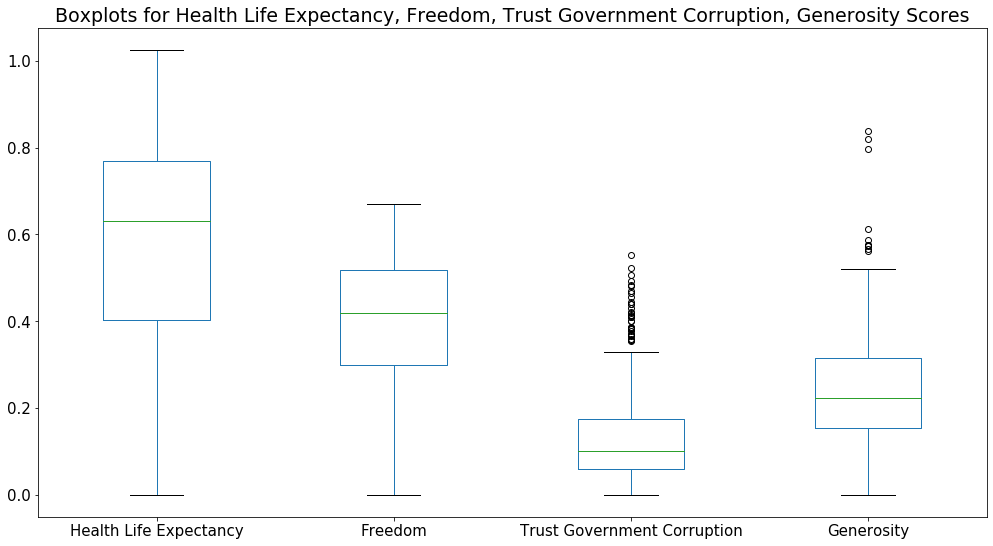

In [74]:
#boxplot of 'Health Life Expectancy', 'Freredom', 'Trust Government Corruption', 'Generosity' for 2015-2017
dataset[['Health Life Expectancy','Freedom','Trust Government Corruption','Generosity']].plot.box(figsize=(17,9))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Boxplots for Health Life Expectancy, Freedom, Trust Government Corruption, Generosity Scores', fontsize=19)

In [75]:
#calculate z-score
from scipy import stats
zscore = pd.DataFrame(stats.zscore(dataset.loc[:,'Economy GDP per Capita':'Generosity']))
zscore.head()

,0,1,2,3,4
0,1.128964,1.506687,1.749332,2.562987,0.415050
1,0.902078,1.533406,1.504319,0.059897,1.476821
2,0.957866,1.228285,1.641540,3.136666,0.754540
3,1.279491,1.272344,1.777030,2.070607,0.797157
4,0.959817,1.357461,1.532282,1.751706,1.642799


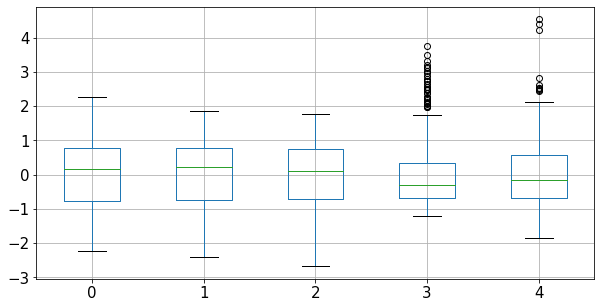

In [76]:
#plot variables using their respective z-score
zscore.plot.box(figsize=(10,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)

#### Since we see that outliers are present in Trust Government Corruption and Generosity Scores, we decide to investigate which specific countries are outliers in the former through the IQR approach.

In [77]:
Q1_corruption = dataset['Trust Government Corruption'].quantile(0.25)
Q3_corruption = dataset['Trust Government Corruption'].quantile(0.75)
IQR_corruption = Q3_corruption - Q1_corruption

print(IQR_corruption,Q1_corruption,Q3_corruption)

0.11338348364472353 0.05977741578578949 0.17316089943051302


In [80]:
#outlier data in 'Trust Government Corruption'
dataset[(dataset['Trust Government Corruption'] < (Q1_corruption + 1.5 * IQR_corruption))][['Country_x','Year','Trust Government Corruption']].sort_values(by='Trust Government Corruption', ascending=True)

,Country_x,Year,Trust Government Corruption
244,Bosnia-Herzegovina,2016,0.000000
404,Bosnia-Herzegovina,2017,0.000000
73,Indonesia,2015,0.000000
95,Bosnia-Herzegovina,2015,0.002270
236,Indonesia,2016,0.003220
371,Romania,2017,0.004388
286,Bulgaria,2016,0.006150
85,Romania,2015,0.006490
228,Romania,2016,0.006790
133,Bulgaria,2015,0.008720
